In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Checking whether there is any null value
data.isnull().values.any()

False

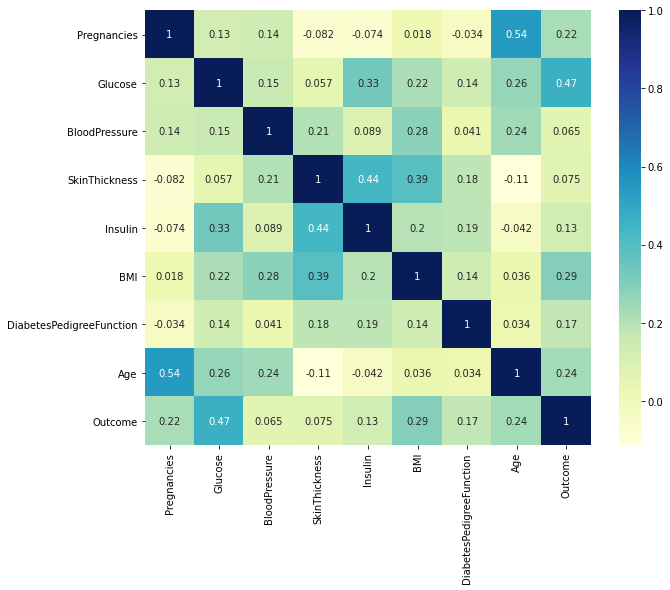

In [6]:
#displaying the heatmap
import seaborn as sns
corrmat = data.corr()
top_corr_factors = corrmat.index
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, annot = True, cmap = "YlGnBu")


In [7]:
#Checking whether the data is balanced or not

is_diabetes = len(data.loc[data['Outcome']==1])
no_diabetes = len(data.loc[data['Outcome']==0])
print('total people with diabetes are : {}'.format(is_diabetes))
print("total people who don't have diabetes are : {}".format(no_diabetes))

total people with diabetes are : 268
total people who don't have diabetes are : 500


In [8]:
index = (corrmat.index)
print(index)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
#Printing the total number of 0 entries in each column
for value in index:
    print(f"Total no of missing data in column {value} : {len(data.loc[data[value]==0])}")

Total no of missing data in column Pregnancies : 111
Total no of missing data in column Glucose : 5
Total no of missing data in column BloodPressure : 35
Total no of missing data in column SkinThickness : 227
Total no of missing data in column Insulin : 374
Total no of missing data in column BMI : 11
Total no of missing data in column DiabetesPedigreeFunction : 0
Total no of missing data in column Age : 0
Total no of missing data in column Outcome : 500


In [10]:
#Splitting X and y
X = data.iloc[:,:8]
y = data['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
#Splitting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
#Replacing all the 0 entries by the mean of the respectiv column
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = 0, strategy = "mean")
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)

Using Random Forest for the classification

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

In [14]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [15]:
y_pred = rf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
acc = accuracy_score(y_pred, y_test)
cm = confusion_matrix(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

In [17]:
print(f"accuracy is : {acc}")
print(f"confusion matrix is : {cm}")
print(f"f1 score is : {f1}")

accuracy is : 0.7402597402597403
confusion matrix is : [[119  28]
 [ 32  52]]
f1 score is : 0.6341463414634146


Using XGboost for the classification

In [18]:
import xgboost
classifier = xgboost.XGBClassifier()

In [19]:
params = {
"learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
"max_depth" : [3,4,5,6,8,10,12,15],
"min_child_weight" : [1,3,5,7],
"gamma" : [0.0,0.1,0.2,0.3,0.4],
"colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [20]:
#Trying the RandomizedSearchCV approach for getting the best best of hyperparameters 
from sklearn.model_selection import RandomizedSearchCV

random_search_xg = RandomizedSearchCV(classifier, param_distributions = params)
random_search_xg.fit(X_train,y_train)
random_search_xg.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [21]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [22]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [23]:
y_pred_xg = classifier.predict(X_test)

In [24]:
acc_xg = accuracy_score(y_pred_xg,y_test)
cm_xg = confusion_matrix(y_pred_xg,y_test)
f1_xg = f1_score(y_pred_xg,y_test)
print(f"accuracy by xgboost is : {acc_xg}")
print(f"f1 score by xgboost is : {f1_xg}")

accuracy by xgboost is : 0.7532467532467533
f1 score by xgboost is : 0.6586826347305389


In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15,n_jobs = -1)

In [29]:
knn_params = {
    "n_neighbors" : [5,7,10,12,15,17,20],
    "leaf_size" : [10,20,30,40,50,60,70]
}

In [30]:
knn_search = RandomizedSearchCV(knn, knn_params)
knn_search.fit(X_train,y_train)
knn_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='uniform')

In [32]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                     weights='uniform')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
acc_knn = accuracy_score(knn_pred, y_test)
f1_knn = f1_score(knn_pred, y_test)
print("The model accuracy is : {}".format(acc_knn))
print("The f1 score of the model is : {}".format(f1_knn))

The model accuracy is : 0.7316017316017316
The f1 score of the model is : 0.5974025974025973
